### Import libraries

In [1]:
import geopandas as gpd
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Read geojson file

In [2]:
df = gpd.read_file('datasets/do_prace_na_kole.geojson')

### Basic dataset info

1. ID: `UnitId` + `datum` + `FirstDirection_Name`/`SecondDirection_Name`
2. Match to specific street/GIS: `Latitude` + `Longitude` (they match it with https://www.ceda.cz/ street data. Methodology explained in word doc)
3. Useful information: `FirstDirection_Cyclists`, `SecondDirection_Cyclists`

In [3]:
display(df.head())
display(f"Shape: {df.shape}")
display("Columns:", df.columns)
display(df.describe())

,OBJECTID,GID_ROAD,COUNT_LINE,data_2018,data_2019,data_2020,data_2021,GlobalID,SHAPE_Length,geometry
0,1,3512.0,2.0,0,0,0,1,{EE939FC1-CD8B-4FF6-9C02-482838DEFCCF},0.002066,"MULTILINESTRING ((16.69839 49.30872, 16.69838 ..."
1,2,3515.0,44.0,3,5,3,34,{DD11C42A-AC4E-4B32-B156-8349C09E0C9A},0.000113,"MULTILINESTRING ((16.66312 49.29681, 16.66320 ..."
2,3,3516.0,87.0,10,17,10,49,{146C1D8E-8230-4684-B278-85F8D437CA0E},0.000821,"MULTILINESTRING ((16.66234 49.29709, 16.66312 ..."
3,4,4168.0,16.0,2,4,2,7,{23E90BA7-03CE-4634-98CF-972C5B5ACB1B},0.001342,"MULTILINESTRING ((16.64117 49.39327, 16.64130 ..."
4,5,4169.0,20.0,1,1,1,18,{139D0C9D-70BF-4DD2-AB80-CD62BED3CBD9},0.000630,"MULTILINESTRING ((16.64110 49.39303, 16.64173 ..."


'Shape: (65177, 10)'

'Columns:'

Index(['OBJECTID', 'GID_ROAD', 'COUNT_LINE', 'data_2018', 'data_2019',
       'data_2020', 'data_2021', 'GlobalID', 'SHAPE_Length', 'geometry'],
      dtype='object')

,OBJECTID,GID_ROAD,COUNT_LINE,data_2018,data_2019,data_2020,data_2021,SHAPE_Length
count,65177.000000,65177.000000,65177.000000,65177.000000,65177.000000,65177.000000,65177.000000,65177.000000
mean,32589.000000,178834.981926,138.022401,24.114396,39.441413,23.777728,50.619574,0.001055
std,18815.123584,68036.420495,374.658794,70.162878,114.920825,69.144389,127.073586,0.001536
min,1.000000,3512.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000001
25%,16295.000000,148173.000000,8.000000,1.000000,1.000000,1.000000,3.000000,0.000250
50%,32589.000000,201989.000000,29.000000,4.000000,6.000000,4.000000,12.000000,0.000550
75%,48883.000000,231029.000000,107.000000,17.000000,28.000000,17.000000,44.000000,0.001184
max,65177.000000,255362.000000,9150.000000,1787.000000,2927.000000,1761.000000,2674.000000,0.035307


<AxesSubplot:>

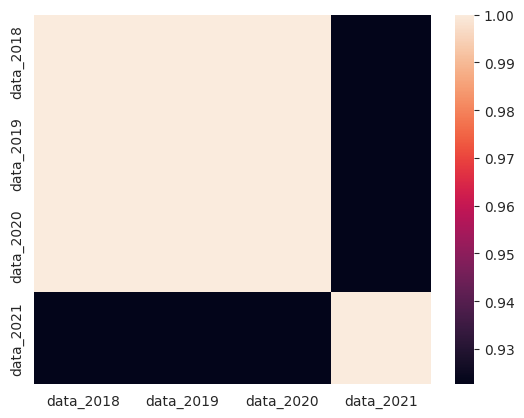

In [4]:
corr_matrix = df[['data_2018', 'data_2019', 'data_2020', 'data_2021']].corr()
sns.heatmap(corr_matrix)

In [5]:
len(df['GID_ROAD'].unique()) == len(df['GID_ROAD'])

True